In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### Visualizing the Data

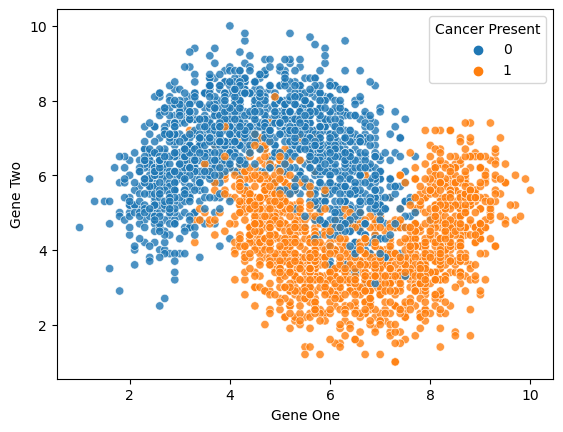

In [4]:
sns.scatterplot(data = df , x = 'Gene One' , y = 'Gene Two' , hue = 'Cancer Present' , alpha = 0.8)
plt.show()

### Performing Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns = 'Cancer Present')
y = df['Cancer Present']

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3)

### Scaling the Data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

### KNN With K = 1

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_model = KNeighborsClassifier(1)

In [14]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
prediction = knn_model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [17]:
confusion_matrix(y_test , prediction)

array([[400,  33],
       [ 35, 432]], dtype=int64)

In [18]:
classification_report(y_test , prediction)

'              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92       433\n           1       0.93      0.93      0.93       467\n\n    accuracy                           0.92       900\n   macro avg       0.92      0.92      0.92       900\nweighted avg       0.92      0.92      0.92       900\n'

In [19]:
accuracy_score(y_test , prediction)

0.9244444444444444

### Checking Different values of K

In [23]:
k_val = np.arange(0,20,1)
k_val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [38]:
output = []
for i in range(1 , 20):
    model = KNeighborsClassifier(i)
    model.fit(X_train , y_train)
    prediction = model.predict(X_test)
    output.append(accuracy_score(y_test , prediction))


In [39]:
print(output)

[0.9244444444444444, 0.9155555555555556, 0.9355555555555556, 0.93, 0.9388888888888889, 0.9366666666666666, 0.9433333333333334, 0.9422222222222222, 0.9422222222222222, 0.9422222222222222, 0.9422222222222222, 0.9388888888888889, 0.94, 0.9422222222222222, 0.9422222222222222, 0.9422222222222222, 0.9433333333333334, 0.9444444444444444, 0.9444444444444444]


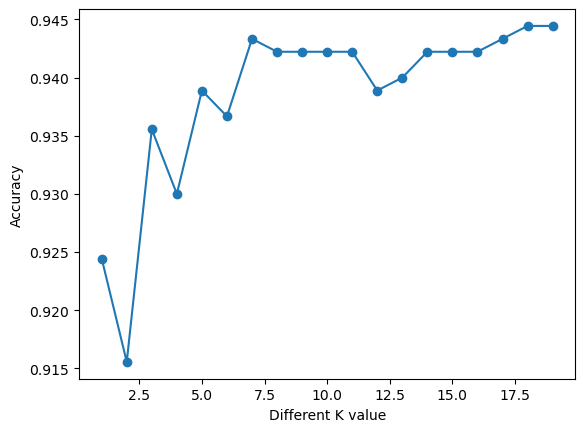

In [43]:
plt.plot(range(1 , 20) , output , marker = 'o')
plt.xlabel('Different K value')
plt.ylabel('Accuracy')
plt.show()

In [45]:
# So for K = 7 We are getting the best accuracy . After that increase in vallue of k is not benefiting. 

###  Build model on k = 7

In [46]:
model = KNeighborsClassifier(7)

In [47]:
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
prediction = model.predict(X_test)

In [49]:
accuracy_score(y_test , prediction)

0.9433333333333334

In [50]:
confusion_matrix(y_test,prediction)

array([[412,  21],
       [ 30, 437]], dtype=int64)

### Plotting Decision Boundry of KNN

In [55]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

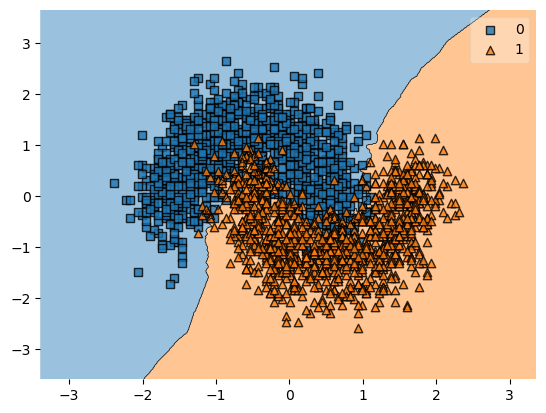

In [59]:
plot_decision_regions(X_train , np.array(y_train) , model)

### Finding Best value of K using GridSearchCV

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [62]:
df.dtypes

Gene One          float64
Gene Two          float64
Cancer Present      int64
dtype: object